In [15]:
import shift_detector
from shift_detector.detector import Detector
from shift_detector.checks.simple_check import SimpleCheck
from shift_detector.checks.distinction_check import DistinctionCheck
from shift_detector.checks.sorensen_dice_check import SorensenDiceCheck
from shift_detector.checks.conditional_probabilities_check import ConditionalProbabilitiesCheck

In [16]:
import pandas as pd
'''  
df1 = './../train_ascii.csv'
df1 = pd.read_csv(df1, delimiter=';').sample(100)
df2 = './../audits_ascii.csv'
df2 = pd.read_csv(df2, delimiter=';')
'''
sales = {'brand': ["Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC"] * 10,
         'payment': [150., 200., 50., 10., 5., 150., 200., 50., 10., 5., 1.] * 10,
         'payment2': [15., 2., 5., 0., 5., 3., 200., 50., 10., 5., 1.] * 10,
         'description': ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"] * 10}

sales2 = {'brand': ["Blue Inc", "Alpha Co",
                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC"] * 10,
         'payment': [10, 5, 150, 200, 50, 10, 5, 1] * 10,
         'payment2': [15, 2, 5, 0, 5, 3, 200, 50] * 10,
         'description': ["D", "E", "F", "G", "H", "I", "J", "K"] * 10}

df1 = pd.DataFrame.from_dict(sales)
df2 = pd.DataFrame.from_dict(sales2)

detector = Detector(df1, df2)

2019-06-17 15:59:24,165 [INFO]  Detected numerical columns: payment, payment2
2019-06-17 15:59:24,168 [INFO]  Detected categorical columns: brand
2019-06-17 15:59:24,170 [INFO]  Detected text columns: description
2019-06-17 15:59:24,176 [INFO]  Used columns: brand, payment, payment2, description


In [17]:
sc = SimpleCheck()
dc = DistinctionCheck(num_epochs=10, relative_threshold=0.2)
cp = ConditionalProbabilitiesCheck(min_support=0.01, min_confidence=0.01, rule_limit=10,
                                               min_delta_supports=0.01, min_delta_confidences=0.01)
# sdc = SorensenDiceCheck(n=1)

In [18]:
detector.run(sc)

2019-06-17 15:59:25,137 [INFO]  Execute Simple Check
2019-06-17 15:59:25,138 [INFO]  Execute new Precalculation


OVERVIEW


,Column,# Checks Failed,# Checks Executed
0,payment2,1,1
1,payment,1,1
2,brand,0,1


DETAILS
Simple Check
Examined Columns: ['payment2', 'payment', 'brand']
Shifted Columns: ['payment2', 'payment']

Column 'payment':
Metric: mean with Diff: -0.29 %
Metric: median with Diff: -0.8 %
Metric: quartile_3 with Diff: -0.5 %
Metric: completeness with Diff: -0.27 %

Column 'payment2':
Metric: mean with Diff: +0.3 %
Metric: quartile_1 with Diff: +0.38 %
Metric: quartile_3 with Diff: +0.58 %
Metric: num_distinct with Diff: -0.22 %
Metric: completeness with Diff: -0.27 %
Metric: std with Diff: +0.14 %




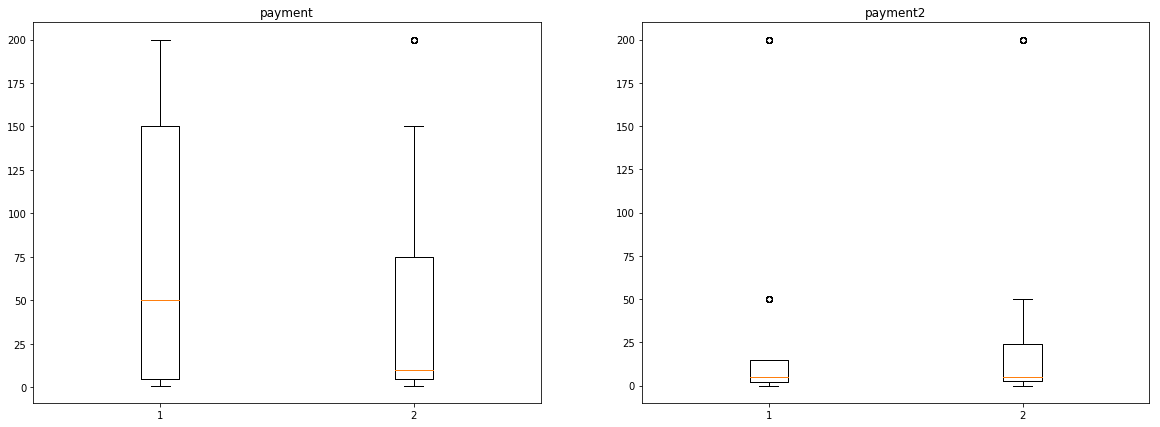

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


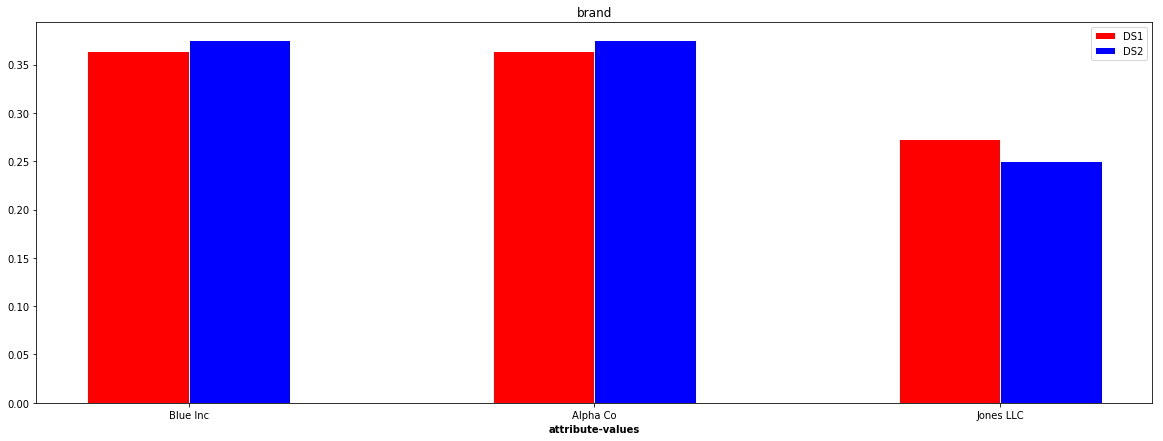

In [19]:
detector.evaluate()